<a href="https://colab.research.google.com/github/Reis25/AprendizadoDeMquinas/blob/master/Projeto_id_garrafas_industria_am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import tensorflow as tf
 
 
from PIL import Image
 
from sklearn.model_selection import train_test_split
 
import matplotlib.pyplot as plt
 
plt.style.use('ggplot')
 
    
# load and display an image with Matplotlib
#from matplotlib import image
 
batch_size = 6
num_classes = 8
epochs = 12
 
# input image dimensions
img_rows, img_cols = 120, 100
 
import os
 
path = './bottles/'
 
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            files.append(file)
 
X = []
 
db = pd.read_csv(path +'bottles_ground_truth.csv', sep = ';', header = None, skiprows = 1)
db = db.fillna(0).to_numpy()

In [2]:
for e in db[:, 0]:
    X.append(np.array(Image.open(path+e).resize((img_cols, img_rows), Image.ANTIALIAS)) )
Y = db[:, 1:]
 
X = np.array(X)
Y = np.array(Y)
 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [3]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
 
datagen.fit(X)
 
# the data, split between train and test sets
 
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (112, 120, 100, 3)
112 train samples
29 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
 
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(518, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
flow = datagen.flow(X, Y, batch_size=36)
Y = Y.astype('int8')
#X = X.astype('int8')

Epoch 1/12
4/4 [==============================] - 19s 5s/step - loss: 1.8156 - accuracy: 0.2979
Epoch 2/12
4/4 [==============================] - 19s 5s/step - loss: 1.7815 - accuracy: 0.3901
Epoch 3/12
4/4 [==============================] - 19s 5s/step - loss: 1.8240 - accuracy: 0.3759
Epoch 4/12
4/4 [==============================] - 19s 5s/step - loss: 1.8139 - accuracy: 0.3830
Epoch 5/12
4/4 [==============================] - 19s 5s/step - loss: 1.7841 - accuracy: 0.4610
Epoch 6/12
4/4 [==============================] - 19s 5s/step - loss: 1.7807 - accuracy: 0.4468
Epoch 7/12
4/4 [==============================] - 19s 5s/step - loss: 1.7918 - accuracy: 0.4823
Epoch 8/12
4/4 [==============================] - 19s 5s/step - loss: 1.7966 - accuracy: 0.4681
Epoch 9/12
4/4 [==============================] - 20s 5s/step - loss: 1.7726 - accuracy: 0.4894
Epoch 10/12
4/4 [==============================] - 20s 5s/step - loss: 1.7812 - accuracy: 0.5248
Epoch 11/12
4/4 [======================

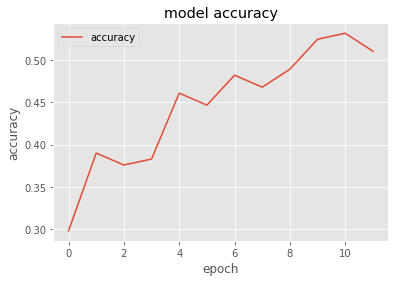

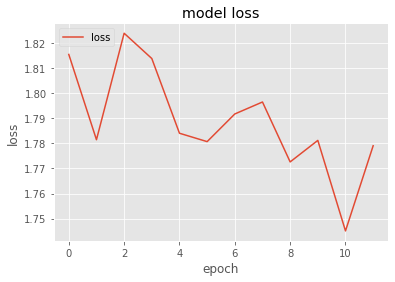

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
 
history = model.fit(datagen.flow(X, Y, batch_size=36), epochs=epochs)

score = model.evaluate(X, Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
 
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()
 
# summarize history for loss
 
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()